# People Economically Active by Sector, Gender and Gender Gap

<Figure size 1000x800 with 0 Axes>

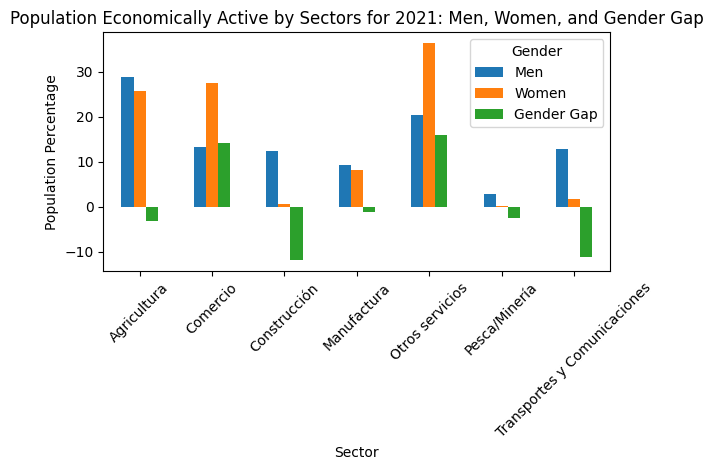

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv(r'c:\Users\jcbur\OneDrive - peruvianbusinesscouncil.org\csv files\#9_peru_agriculture\agriculture_employment\employment_sector_gender.csv')

# Filter rows based on column: 'region_id'
df = df[df['region_id'] == 0]

# Filter rows based on column: 'gender'
df = df[df['gender'] != "Total"]

# Filter rows based on column: 'Sum of year'
df = df[df['Sum of year'] == 2021]

# Rename columns
df = df.rename(columns={'Sum of year': 'year', 'Sum of value_percent': 'employment'})

# Replace all instances of "Mujeres" with "Women" in column: 'gender'
df.loc[df['gender'].str.lower() == "Mujeres".lower(), 'gender'] = "Women"

# Replace all instances of "Hombres" with "Men" in column: 'gender'
df.loc[df['gender'].str.lower() == "Hombres".lower(), 'gender'] = "Men"

# Pivot the dataframe to get 'Women' and 'Men' employment percentages in separate columns
pivot_df = df.pivot(index='sector', columns='gender', values='employment')

# Calculate the gender gap by subtracting 'Men' from 'Women'
pivot_df['Gender Gap'] = pivot_df['Women'] - pivot_df['Men']

# Reset index to get 'sector' as a column
pivot_df.reset_index(inplace=True)

# Plot the chart comparing men, women, and the gender gap
plt.figure(figsize=(10, 8))
pivot_df.plot(x='sector', y=['Men', 'Women', 'Gender Gap'], kind='bar')
plt.title('Population Economically Active by Sectors for 2021: Men, Women, and Gender Gap')
plt.xlabel('Sector')
plt.ylabel('Population Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()